In [121]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from utility import get_spotify_data, get_spotify_client
import spotipy as sp
import plotly.express as px
import datetime as dt

In [2]:
%%capture
sp = get_spotify_client()

In [3]:
streaming_history = get_spotify_data('StreamingHistory')
streaming_history[:3]

[{'endTime': '2020-12-22 22:45',
  'artistName': 'meganeko',
  'trackName': 'Stasis',
  'msPlayed': 226000},
 {'endTime': '2020-12-22 22:59',
  'artistName': 'meganeko',
  'trackName': 'Robot Language',
  'msPlayed': 190008},
 {'endTime': '2020-12-22 23:05',
  'artistName': 'meganeko',
  'trackName': 'Robot Language',
  'msPlayed': 8435}]

In [102]:
df = pd.DataFrame.from_records(streaming_history)
df['endTime'] = pd.to_datetime(df['endTime'])

df['date_played'] = df['endTime'].dt.date
df['week_played'] = df['endTime'].dt.isocalendar().week
del df['trackName']
del df['endTime']
df = df.groupby(by=['week_played', 'date_played', 'artistName'], as_index=False).sum('msPlayed')
df['mins_played'] = df['msPlayed'] / 60000
# TODO: Convert msPlayed to minutes, then figure out how much to plot that genre
df.head()

,week_played,date_played,artistName,msPlayed,mins_played
0,1,2021-01-04,A Day To Remember,400062,6.667700
1,1,2021-01-04,André De Shields,1173187,19.553117
2,1,2021-01-04,Bad Wolves,654568,10.909467
3,1,2021-01-04,Black Veil Brides,228875,3.814583
4,1,2021-01-04,Bossfight,598582,9.976367


,week_played,artistName,msPlayed,mins_played,id,type,genres,time_listened_so_far
date_played,,,,,,,,
2021-01-04,1,A Day To Remember,400062,6.66770,4NiJW4q9ichVqL1aUsgGAN,artist,metalcore,6.667700
2021-01-04,1,A Day To Remember,400062,6.66770,4NiJW4q9ichVqL1aUsgGAN,artist,pop punk,6.667700
2021-01-04,1,A Day To Remember,400062,6.66770,4NiJW4q9ichVqL1aUsgGAN,artist,screamo,6.667700
2021-01-05,1,A Day To Remember,388158,6.46930,4NiJW4q9ichVqL1aUsgGAN,artist,metalcore,13.137000
2021-01-05,1,A Day To Remember,388158,6.46930,4NiJW4q9ichVqL1aUsgGAN,artist,pop punk,13.137000
...,...,...,...,...,...,...,...,...
2020-12-31,53,Bon Jovi,201366,3.35610,58lV9VcRSjABbAbfWS6skp,artist,glam metal,3.356100
2020-12-31,53,Bon Jovi,201366,3.35610,58lV9VcRSjABbAbfWS6skp,artist,hard rock,6.793867
2020-12-31,53,Bon Jovi,201366,3.35610,58lV9VcRSjABbAbfWS6skp,artist,rock,207.685100


In [141]:
dft = df.set_index(pd.DatetimeIndex(df['date_played']))# .between_date(dt.date(2020, 1, 1), dt.date(2020, 12, 31))
# dft["2020-01":"2021-01"]
dft

,week_played,date_played,artistName,msPlayed,mins_played,id,type,genres,time_listened_so_far
date_played,,,,,,,,,
2021-01-04,1,2021-01-04,A Day To Remember,400062,6.66770,4NiJW4q9ichVqL1aUsgGAN,artist,metalcore,6.667700
2021-01-04,1,2021-01-04,A Day To Remember,400062,6.66770,4NiJW4q9ichVqL1aUsgGAN,artist,pop punk,6.667700
2021-01-04,1,2021-01-04,A Day To Remember,400062,6.66770,4NiJW4q9ichVqL1aUsgGAN,artist,screamo,6.667700
2021-01-05,1,2021-01-05,A Day To Remember,388158,6.46930,4NiJW4q9ichVqL1aUsgGAN,artist,metalcore,13.137000
2021-01-05,1,2021-01-05,A Day To Remember,388158,6.46930,4NiJW4q9ichVqL1aUsgGAN,artist,pop punk,13.137000
...,...,...,...,...,...,...,...,...,...
2020-12-31,53,2020-12-31,Bon Jovi,201366,3.35610,58lV9VcRSjABbAbfWS6skp,artist,glam metal,3.356100
2020-12-31,53,2020-12-31,Bon Jovi,201366,3.35610,58lV9VcRSjABbAbfWS6skp,artist,hard rock,6.793867
2020-12-31,53,2020-12-31,Bon Jovi,201366,3.35610,58lV9VcRSjABbAbfWS6skp,artist,rock,207.685100


In [5]:
sp.search(q='Troy Baker', limit=1, type='artist')

{'artists': {'href': 'https://api.spotify.com/v1/search?query=Troy+Baker&type=artist&offset=0&limit=1',
  'items': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/4M7pgam2rtn4p2LHkKjEm2'},
    'followers': {'href': None, 'total': 11857},
    'genres': [],
    'href': 'https://api.spotify.com/v1/artists/4M7pgam2rtn4p2LHkKjEm2',
    'id': '4M7pgam2rtn4p2LHkKjEm2',
    'images': [{'height': 640,
      'url': 'https://i.scdn.co/image/ab67616d0000b273f14dcd74a3579331cd938e73',
      'width': 640},
     {'height': 300,
      'url': 'https://i.scdn.co/image/ab67616d00001e02f14dcd74a3579331cd938e73',
      'width': 300},
     {'height': 64,
      'url': 'https://i.scdn.co/image/ab67616d00004851f14dcd74a3579331cd938e73',
      'width': 64}],
    'name': 'Troy Baker',
    'popularity': 27,
    'type': 'artist',
    'uri': 'spotify:artist:4M7pgam2rtn4p2LHkKjEm2'}],
  'limit': 1,
  'next': 'https://api.spotify.com/v1/search?query=Troy+Baker&type=artist&offset=1&limit=1',
  'offset'

In [6]:
def get_artist_id(artist_name: str):
    search_data = sp.search(q=artist_name, limit=1, type='artist,episode,show')['artists']['items']
    if len(search_data) > 0:
        return search_data[0]['id'], search_data[0]['type'], search_data[0]['genres']
    else:
#        print(f'{artist_name}: {search_data}')
        return None, None, None

In [7]:
artist_focus_df = df[['artistName']].drop_duplicates()
artist_focus_df[['id', 'type', 'genres']] = artist_focus_df[['artistName']].apply(lambda r: get_artist_id(r['artistName']), result_type='expand', axis=1)
artist_focus_df

,artistName,id,type,genres
0,Panic! At The Disco,20JZFwl6HVl6yg8a4H3ZqK,artist,"[baroque pop, emo, modern rock]"
1,Johann Sebastian Bach,5aIqB5nVVvmFsvSdExz408,artist,"[baroque, classical, early music, german baroque]"
2,Austin Wintory,3Rwlus4QnnBSnTe8pJV0rw,artist,"[indie game soundtrack, japanese vgm, scorecor..."
3,"""Weird Al"" Yankovic",1bDWGdIC2hardyt55nlQgG,artist,"[comedy rock, comic, parody]"
4,11 Acorn Lane,3D8pAbIPK2aPh9VbWjett5,artist,"[electro swing, nu jazz]"
...,...,...,...,...
17294,Obsydians,5hJH9VFYVgdag6AYINvJWO,artist,[cyber metal]
17298,Patient Zero,7z6qM92XcUIwugTRs2PcmZ,artist,[]
17302,Rumahoy,52aKFP2BnAa28POINNExhE,artist,[pirate]
17306,Troy Baker,4M7pgam2rtn4p2LHkKjEm2,artist,[]


In [103]:
df = df.merge(artist_focus_df, on='artistName')
df

,week_played,date_played,artistName,msPlayed,mins_played,id,type,genres
0,1,2021-01-04,A Day To Remember,400062,6.667700,4NiJW4q9ichVqL1aUsgGAN,artist,"[metalcore, pop punk, screamo]"
1,1,2021-01-05,A Day To Remember,388158,6.469300,4NiJW4q9ichVqL1aUsgGAN,artist,"[metalcore, pop punk, screamo]"
2,1,2021-01-06,A Day To Remember,23,0.000383,4NiJW4q9ichVqL1aUsgGAN,artist,"[metalcore, pop punk, screamo]"
3,1,2021-01-07,A Day To Remember,1208124,20.135400,4NiJW4q9ichVqL1aUsgGAN,artist,"[metalcore, pop punk, screamo]"
4,1,2021-01-08,A Day To Remember,242797,4.046617,4NiJW4q9ichVqL1aUsgGAN,artist,"[metalcore, pop punk, screamo]"
...,...,...,...,...,...,...,...,...
17386,53,2020-12-28,Crankdat,417371,6.956183,5lCekoJW9jNq01B1wiqdAb,artist,"[bass trap, dubstep, edm, electro house, elect..."
17387,53,2020-12-30,Superflat,144152,2.402533,5b4stUHH8NXrg63fgtzbT0,artist,"[funk mexicano, future funk]"
17388,53,2020-12-31,Bon Jovi,201366,3.356100,58lV9VcRSjABbAbfWS6skp,artist,"[glam metal, hard rock, rock]"
17389,53,2021-01-03,Metalwings,152445,2.540750,3VBzzOmjwLUcUaxT7JxVGF,artist,"[bulgarian metal, symphonic power metal]"


In [104]:
df = df[df['type'] == 'artist']
df

,week_played,date_played,artistName,msPlayed,mins_played,id,type,genres
0,1,2021-01-04,A Day To Remember,400062,6.667700,4NiJW4q9ichVqL1aUsgGAN,artist,"[metalcore, pop punk, screamo]"
1,1,2021-01-05,A Day To Remember,388158,6.469300,4NiJW4q9ichVqL1aUsgGAN,artist,"[metalcore, pop punk, screamo]"
2,1,2021-01-06,A Day To Remember,23,0.000383,4NiJW4q9ichVqL1aUsgGAN,artist,"[metalcore, pop punk, screamo]"
3,1,2021-01-07,A Day To Remember,1208124,20.135400,4NiJW4q9ichVqL1aUsgGAN,artist,"[metalcore, pop punk, screamo]"
4,1,2021-01-08,A Day To Remember,242797,4.046617,4NiJW4q9ichVqL1aUsgGAN,artist,"[metalcore, pop punk, screamo]"
...,...,...,...,...,...,...,...,...
17386,53,2020-12-28,Crankdat,417371,6.956183,5lCekoJW9jNq01B1wiqdAb,artist,"[bass trap, dubstep, edm, electro house, elect..."
17387,53,2020-12-30,Superflat,144152,2.402533,5b4stUHH8NXrg63fgtzbT0,artist,"[funk mexicano, future funk]"
17388,53,2020-12-31,Bon Jovi,201366,3.356100,58lV9VcRSjABbAbfWS6skp,artist,"[glam metal, hard rock, rock]"
17389,53,2021-01-03,Metalwings,152445,2.540750,3VBzzOmjwLUcUaxT7JxVGF,artist,"[bulgarian metal, symphonic power metal]"


In [105]:
df = df.explode('genres').dropna(subset=['genres'])
cumulative_sum_df = df.explode('genres').groupby(['week_played', 'genres'], as_index=False).cumsum()
df['time_listened_so_far'] = cumulative_sum_df['mins_played']
df

,week_played,date_played,artistName,msPlayed,mins_played,id,type,genres,time_listened_so_far
0,1,2021-01-04,A Day To Remember,400062,6.66770,4NiJW4q9ichVqL1aUsgGAN,artist,metalcore,6.667700
0,1,2021-01-04,A Day To Remember,400062,6.66770,4NiJW4q9ichVqL1aUsgGAN,artist,pop punk,6.667700
0,1,2021-01-04,A Day To Remember,400062,6.66770,4NiJW4q9ichVqL1aUsgGAN,artist,screamo,6.667700
1,1,2021-01-05,A Day To Remember,388158,6.46930,4NiJW4q9ichVqL1aUsgGAN,artist,metalcore,13.137000
1,1,2021-01-05,A Day To Remember,388158,6.46930,4NiJW4q9ichVqL1aUsgGAN,artist,pop punk,13.137000
...,...,...,...,...,...,...,...,...,...
17388,53,2020-12-31,Bon Jovi,201366,3.35610,58lV9VcRSjABbAbfWS6skp,artist,glam metal,3.356100
17388,53,2020-12-31,Bon Jovi,201366,3.35610,58lV9VcRSjABbAbfWS6skp,artist,hard rock,6.793867
17388,53,2020-12-31,Bon Jovi,201366,3.35610,58lV9VcRSjABbAbfWS6skp,artist,rock,207.685100
17389,53,2021-01-03,Metalwings,152445,2.54075,3VBzzOmjwLUcUaxT7JxVGF,artist,bulgarian metal,2.540750


In [47]:
def determine_plotted_genre(genre, total_mins_listened):
    total_days_listened = total_mins_listened / 1440
    if total_days_listened >= 2:
        return genre
    return 'Other'

In [106]:
genres_df = df.groupby('genres', as_index=False).sum('mins_played')
# genres_df['plotted_genre'] = genres_df[['genres', 'mins_played']].apply
genres_df['plotted_genre'] = genres_df[['genres', 'mins_played']].apply(lambda r: determine_plotted_genre(r['genres'], r['mins_played']), axis=1)
genres_df

,genres,week_played,msPlayed,mins_played,time_listened_so_far,plotted_genre
0,8-bit,21,1748,0.029133,0.029133,Other
1,a cappella,12,17188,0.286467,0.286467,Other
2,abstract hip hop,50,4549,0.075817,0.075817,Other
3,acid rock,95,477617,7.960283,7.960283,Other
4,acoustic blues,32,68694,1.144900,1.144900,Other
...,...,...,...,...,...,...
889,world worship,4789,84612860,1410.214333,7222.659917,Other
890,worship,5972,42070602,701.176700,3986.224333,Other
891,wrestling,875,4900493,81.674883,133.488200,Other
892,wyoming indie,271,1844045,30.734083,48.971000,Other


In [107]:
plot_df = df.merge(genres_df[['genres', 'plotted_genre']], on='genres')[['plotted_genre', 'week_played', 'date_played', 'mins_played', 'time_listened_so_far']]
plot_df = plot_df[plot_df['plotted_genre'] != 'Other']
plot_df

,plotted_genre,week_played,date_played,mins_played,time_listened_so_far
0,metalcore,1,2021-01-04,6.667700,6.667700
1,metalcore,1,2021-01-05,6.469300,13.137000
2,metalcore,1,2021-01-06,0.000383,13.137383
3,metalcore,1,2021-01-07,20.135400,33.272783
4,metalcore,1,2021-01-08,4.046617,37.319400
...,...,...,...,...,...
51318,swiss metal,52,2020-12-21,0.020400,0.020400
51319,swiss metal,52,2020-12-26,0.000000,0.020400
51320,swiss metal,52,2020-12-27,18.939433,18.959833
51321,swiss metal,53,2020-12-29,0.002617,0.002617


In [65]:
px.area(plot_df, x='week_played', y='time_listened_so_far', color='plotted_genre')

In [108]:
cross_df = pd.crosstab(index=plot_df['plotted_genre'], columns=plot_df['week_played'], dropna=False)
cross_df

week_played,1,2,3,4,5,6,7,8,9,10,...,44,45,46,47,48,49,50,51,52,53
plotted_genre,,,,,,,,,,,,,,,,,,,,,
alternative metal,36,40,39,37,27,43,49,31,54,25,...,25,39,28,21,20,67,53,27,40,44
baroque pop,7,7,7,6,4,6,7,3,5,3,...,6,5,5,3,5,7,7,7,6,7
bitpop,0,0,1,12,1,0,0,0,0,2,...,11,12,4,2,7,14,16,4,9,4
bow pop,0,0,0,0,0,0,0,1,0,0,...,3,2,1,0,0,6,6,3,3,3
broadway,11,20,16,15,13,16,18,8,21,15,...,0,2,0,0,0,4,0,0,5,19
celtic metal,0,0,0,0,0,0,0,0,0,0,...,3,2,1,0,0,6,6,3,3,2
chicago hardcore,7,7,6,6,4,7,7,3,6,3,...,5,6,4,1,3,6,7,5,5,7
chicago punk,7,7,6,6,4,7,7,3,6,3,...,5,6,4,1,3,6,7,5,5,7
chiptune,21,21,19,43,16,17,16,8,16,14,...,41,40,16,7,23,49,50,29,30,28


ValueError: operands could not be broadcast together with shapes (368,) (55,) 

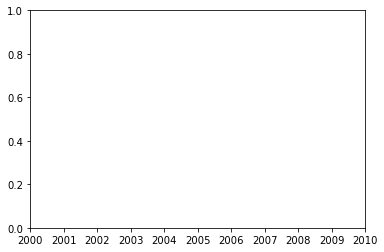

In [120]:
# unique_date_played = pd.to_datetime(plot_df[['date_played']].drop_duplicates())
x = plot_df['date_played'].unique()
y = cross_df.values.T
labels = plot_df['plotted_genre'].unique()
# plt.stackplot(x, y, labels=plot_df['plotted_genre'].unique())
plt.stackplot(x, y)
